# Exploration, clean-up and all that

This notebook contains initial exploration and clean-up of data, as well as curating the final dataset and classifying "diverse" books.

In [1]:
#load packages

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns

sns.set()

In [2]:
#load data

books = pd.read_csv('goodreads2/books.csv')
users = pd.read_csv('goodreads2/ratings.csv')
tags= pd.read_csv('goodreads2/tags.csv')
bt = pd.read_csv('goodreads2/book_tags.csv')

In [3]:
books.tail()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...
9999,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,9162,9700,364,117,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...


In [4]:
books.drop(['image_url','small_image_url'],axis=1,inplace=True)

In [5]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [6]:
bt.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [7]:
#Merge the dataframes so that we have tag name against books

btag = bt.merge(tags, on='tag_id',how='inner')

In [8]:
#Let's drop the to-read tag

btag = btag[btag['tag_id']!=30574]

In [9]:
btag.head()

,goodreads_book_id,tag_id,count,tag_name
9983,1,11305,37174,fantasy
9984,2,11305,3441,fantasy
9985,3,11305,47478,fantasy
9986,5,11305,39330,fantasy
9987,6,11305,38378,fantasy


In [10]:
#Let's drop some commonly occurring tags that aren't useful

btag = btag.loc[~btag.tag_name.isin(['currently-reading','favorite','favourite','favorites','favourites','books-i-own','owned'])]

In [11]:
# Let's see the commonly occuring tags

btag.groupby(['tag_name','tag_id'])['count'].sum().sort_values(ascending=False).reset_index()

,tag_name,tag_id,count
0,fiction,11743,3688819
1,fantasy,11305,3548157
2,young-adult,33114,1848306
3,classics,7457,1756920
4,romance,26138,1231926
...,...,...,...
34239,w_europa_norvegia,32014,1
34240,i-tried-peanut-butter-filled-chocol,15189,1
34241,biografies,4583,1
34242,challenge-2013,6552,-1


In [12]:
#Filter book tags so that each tag that is considered has at least a count of 50 

#btag = btag.loc[btag['count']>=50]

In [13]:
btag.goodreads_book_id.nunique()

10000

In [14]:
btag = btag.sort_values(['goodreads_book_id','count'],ascending=[True,False])

In [15]:
btag['tag_name'].nunique()

34244

## Narrow the tags that indicate diversity

In [16]:
#How many books have lgbt tags?

btag.loc[(btag['tag_name'].str.contains('lgbt'))|(btag['tag_name'].str.contains('gay'))|(btag['tag_name']=='m-m')|(btag['tag_name']=='f-f')]['goodreads_book_id'].count()

1059

In [17]:
btag2 = btag.copy()

In [18]:
narrowed_tags1= tags.loc[(tags['tag_name'].str.contains('poc'))|(tags['tag_name'].str.contains('lgbt'))|(tags['tag_name'].str.contains('asia'))|(tags['tag_name'].str.contains('africa'))|(tags['tag_name'].str.contains('afro'))|(tags['tag_name'].str.contains('gay'))|(tags['tag_name'].str.contains('m-m'))|(tags['tag_name'].str.contains('f-f'))]

In [19]:
narrowed_tags1 = narrowed_tags1.loc[~narrowed_tags1['tag_name'].str.contains('apocalyp')]

In [20]:
narrowed_tags1.shape

(206, 2)

In [21]:
narrowed_tags2 = tags.loc[
                    (tags['tag_name'].str.contains('latin'))|(tags['tag_name'].str.contains('pacific-isl'))
                   |(tags['tag_name'].str.contains('female-protagonist'))|(tags['tag_name'].str.contains('indian'))
                |(tags['tag_name'].str.contains('chinese'))|(tags['tag_name'].str.contains('japan'))
                |(tags['tag_name'].str.contains('native-amer'))|(tags['tag_name'].str.contains('korea'))]

In [22]:
narrowed_tags2.shape

(151, 2)

In [23]:
narrowed_tags2

,tag_id,tag_name
393,393,18th-century-japan
2273,2273,america-latina
2306,2306,american-indian
2307,2307,american-indian-lit
2308,2308,american-indians
...,...,...
23772,23772,plethora-japanese-korean-chinese
25176,25176,read-in-japanese
27732,27732,sibling-relatinships
28201,28201,south-korea


In [24]:
narrow_tags = pd.concat([narrowed_tags1,narrowed_tags2])

In [25]:
narrow_tags.shape

(357, 2)

In [26]:
narrow_tags.head()

,tag_id,tag_name
1125,1125,5-star-hall-of-fame
1376,1376,a-song-of-fire-and-ice
1579,1579,adam-mansbach
1643,1643,adult-african-american-fiction
1746,1746,africa


## Let's get merging (part 2)

In [27]:
bt.goodreads_book_id.nunique()

10000

In [28]:
btag_div = btag2.merge(narrow_tags,on=['tag_id'],how='outer')

In [29]:
btag_div.head()

,goodreads_book_id,tag_id,count,tag_name_x,tag_name_y
0,1,11305,37174,fantasy,NaN
1,2,11305,3441,fantasy,NaN
2,3,11305,47478,fantasy,NaN
3,5,11305,39330,fantasy,NaN
4,6,11305,38378,fantasy,NaN


In [30]:
btag_div['is_div'] = 0
btag_div.loc[btag_div['tag_name_y'].isnull()==False,'is_div']=1

In [31]:
btag_div.tail()

,goodreads_book_id,tag_id,count,tag_name_x,tag_name_y,is_div
940129,31538635,14690,6,hogwarts,NaN,0
940130,32848471,16149,21,jan-2017,NaN,0
940131,33288638,27821,9,single-mom,NaN,0
940132,33288638,11478,7,fave-author,NaN,0
940133,33288638,27939,7,slowburn,NaN,0


In [32]:
btag_div.loc[btag_div['is_div']==1]

,goodreads_book_id,tag_id,count,tag_name_x,tag_name_y,is_div
285254,2,11290,194,fantasia,fantasia,1
285255,30,11290,9,fantasia,fantasia,1
285256,33,11290,89,fantasia,fantasia,1
285257,34,11290,158,fantasia,fantasia,1
285258,1307,11290,7,fantasia,fantasia,1
...,...,...,...,...,...,...
938102,17349023,12882,13,gay-marriage,gay-marriage,1
938473,18039755,19962,1,middle-east-and-north-africa,middle-east-and-north-africa,1
939709,23602473,8658,7,cultural-african-american,cultural-african-american,1
939772,23995231,5758,14,british-colonial-africa,british-colonial-africa,1


In [33]:
btag_div.loc[(btag_div['tag_name_y'].str.contains('fantasia'))|(btag_div['tag_name_y'].str.contains('anastasia'))|(btag_div['tag_name_y'].str.contains('pocalyp')),'is_div']=0

In [34]:
book_div = btag_div.groupby('goodreads_book_id')['is_div'].sum().reset_index()

In [35]:
book_div.loc[book_div['is_div']!=0,'is_div'] = 1

In [36]:
book_div.loc[(book_div['is_div']!=0)&(book_div['is_div']!=1)]

,goodreads_book_id,is_div


In [37]:
#book_div.to_csv('goodreads2/book_diverse1.csv')

In [38]:
#btag_div.to_csv('goodreads2/book_narrow_tags.csv')

In [39]:
df_books = books.merge(book_div,left_on='book_id',right_on='goodreads_book_id',how='outer')

df_books = df_books.drop_duplicates()

df_books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,goodreads_book_id,is_div
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,2767052,0
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,3,0
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,41865,0
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,2657,0
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,4671,0


In [40]:
df_books.shape

(10000, 23)

In [41]:
#This is not really necessary but I wanted to see this

df_books['ratings_positive'] = df_books['ratings_3'] + df_books['ratings_4'] + df_books['ratings_5']
df_books['ratings_negative'] = df_books['ratings_1'] + df_books['ratings_2']

df_books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,goodreads_book_id,is_div,ratings_positive,ratings_negative
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,155254,66715,127936,560092,1481305,2706317,2767052,0,4747714,194651
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,3,0,4622885,177180
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,95009,456191,436802,793319,875073,1355439,41865,0,3023831,892993
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,72586,60427,117415,446835,1001952,1714267,2657,0,3163054,177842
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,51992,86236,197621,606158,936012,947718,4671,0,2489888,283857


In [42]:
#df_books.to_csv('goodreads2/all_book_div.csv',index=None)

In [43]:
users.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [44]:
users.book_id.max()

10000

In [45]:
users = users.merge(df_books[['id','book_id']],left_on='book_id',right_on='id',how='left')

In [46]:
users.head()

,book_id_x,user_id,rating,id,book_id_y
0,1,314,5,1,2767052
1,1,439,3,1,2767052
2,1,588,5,1,2767052
3,1,1169,4,1,2767052
4,1,1185,4,1,2767052


In [47]:
book_div.goodreads_book_id.max()

33288638

In [48]:
users.book_id_y.max()

33288638

In [49]:
users.rename({'book_id_x':'book_id','book_id_y':'goodreads_book_id'},axis='columns',inplace=True)

In [50]:
user_book = users.merge(book_div, left_on='goodreads_book_id',right_on='goodreads_book_id',how='left')

In [51]:
user_book.head()

,book_id,user_id,rating,id,goodreads_book_id,is_div
0,1,314,5,1,2767052,0
1,1,439,3,1,2767052,0
2,1,588,5,1,2767052,0
3,1,1169,4,1,2767052,0
4,1,1185,4,1,2767052,0


In [52]:
user_book.loc[user_book.is_div.isnull()]

,book_id,user_id,rating,id,goodreads_book_id,is_div


In [53]:
user_book = user_book.sort_values('book_id',ascending=True).reindex()

In [54]:
user_book.head(10)

,book_id,user_id,rating,id,goodreads_book_id,is_div
0,1,314,5,1,2767052,0
72,1,33890,3,1,2767052,0
71,1,33872,5,1,2767052,0
70,1,33716,5,1,2767052,0
69,1,33697,4,1,2767052,0
68,1,33065,4,1,2767052,0
67,1,32923,5,1,2767052,0
66,1,32748,5,1,2767052,0
65,1,32635,5,1,2767052,0
64,1,32592,4,1,2767052,0


In [55]:
user_book.drop('id',axis=1,inplace=True)

In [56]:
user_book.head()

,book_id,user_id,rating,goodreads_book_id,is_div
0,1,314,5,2767052,0
72,1,33890,3,2767052,0
71,1,33872,5,2767052,0
70,1,33716,5,2767052,0
69,1,33697,4,2767052,0


In [57]:
book_div = user_book.groupby('book_id')['is_div'].sum().reset_index()

In [58]:
#user_book.to_csv('goodreads2/user_book_div.csv',index=None)

In [59]:
book_div.head()

,book_id,is_div
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [60]:
user_div=user_book.groupby('user_id')['is_div'].sum().sort_values(ascending=False).reset_index()

In [61]:
user_div.is_div.max()

130

In [62]:
user_div.is_div.min()

0

In [63]:
user_div.is_div.median()

1.0

In [64]:
user_div.shape

(53424, 2)

In [65]:
user_book.shape

(981756, 5)

In [66]:
user_book.user_id.nunique()

53424

In [67]:
user_div.loc[user_div.is_div>5.].shape

(11734, 2)

In [68]:
user_div['books_reviewed'] = user_book.groupby('user_id').book_id.count()

## Filter users

Filter users such that they've rated at least 25 books and at least 6 diverse books

In [69]:
user_div.loc[(user_div.books_reviewed >= 25)&(user_div['is_div']> 5.)].shape

(2873, 3)

In [70]:
user_list = user_div.loc[(user_div.books_reviewed >= 25)&(user_div['is_div']>=6.)]['user_id'].tolist()

In [71]:
user_book.loc[user_book.user_id.isin(user_list)].book_id.nunique()

9807

In [72]:
user_book.loc[user_book.user_id.isin(user_list)].user_id.nunique()

2873

In [73]:
users =  user_book.loc[user_book.user_id.isin(user_list)]

In [74]:
users.shape

(138459, 5)

In [75]:
users.book_id.nunique()

9807

In [76]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5'],
      dtype='object')

## Let's make some plots

Text(0, 0.5, 'Number of users')

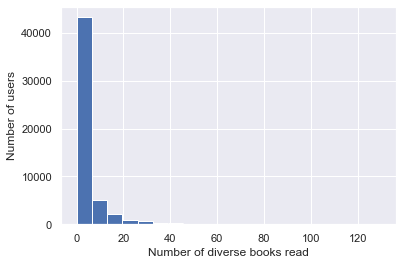

In [77]:
user_div.is_div.plot.hist(bins=20)
plt.xlabel('Number of diverse books read')
plt.ylabel('Number of users')

Text(0, 0.5, 'Number of users')

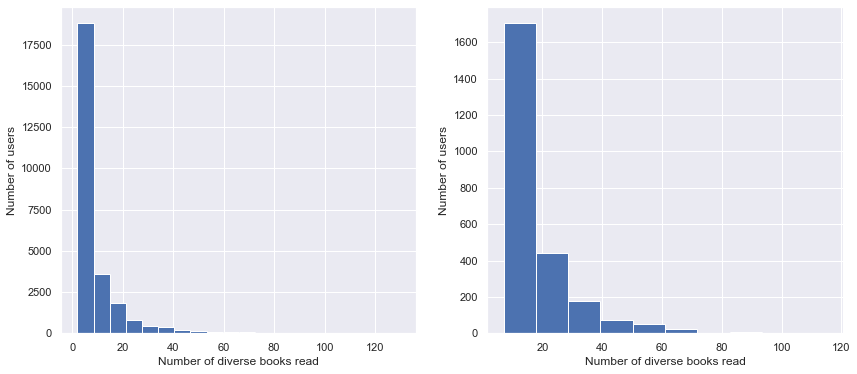

In [78]:
plt.subplot(1,2,1)
user_div.loc[user_div.is_div>1.].is_div.plot.hist(bins=20,figsize=(14,6))
plt.xlabel('Number of diverse books read')
plt.ylabel('Number of users')
plt.subplot(1,2,2)
user_div.loc[(user_div.books_reviewed >= 25)&(user_div['is_div']>6.)].is_div.plot.hist(bins=10,figsize=(14,6))
plt.xlabel('Number of diverse books read')
plt.ylabel('Number of users')
#plt.savefig('user_diversity.jpg')

Text(0, 0.5, 'Number of books')

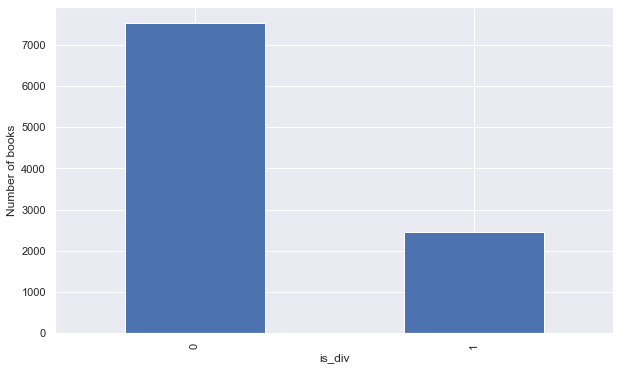

In [79]:
df_books.groupby('is_div')['book_id'].count().reset_index().plot.bar(x='is_div',y='book_id',legend=None,figsize=(10,6))
plt.ylabel('Number of books')
#plt.savefig('eda/book_breakdown.jpg')

In [80]:
df= df_books[['ratings_1','ratings_2','ratings_3','ratings_4','ratings_5']].sum()

In [81]:
a = users.groupby('user_id')['rating'].mean().reset_index()

Text(0, 0.5, 'Number of users')

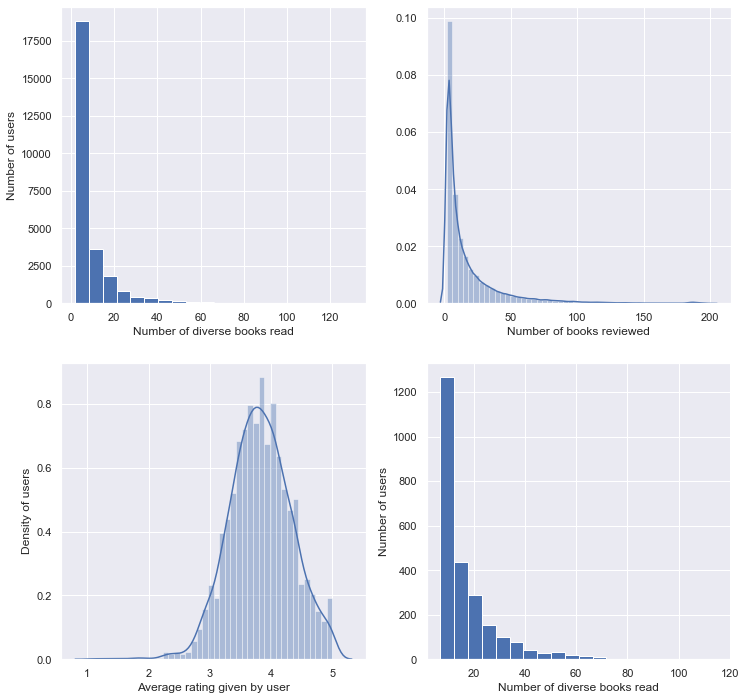

In [82]:
plt.subplot(2,2,1)
user_div.loc[user_div.is_div>1.].is_div.plot.hist(bins=20,figsize=(12,12))
plt.xlabel('Number of diverse books read')
plt.ylabel('Number of users')
plt.subplot(2,2,2)
sns.distplot(user_book.groupby('user_id')['book_id'].count().sort_values(ascending=False).reset_index().book_id)
plt.xlabel('Number of books reviewed')
plt.subplot(2,2,3)
sns.distplot(a.rating)
plt.xlabel('Average rating given by user')
plt.ylabel('Density of users')
plt.subplot(2,2,4)
user_div.loc[(user_div.books_reviewed >= 25)&(user_div['is_div']>6.)].is_div.plot.hist(bins=20,figsize=(12,12))
plt.xlabel('Number of diverse books read')
plt.ylabel('Number of users')
#plt.savefig('eda/eda.jpg')

## Update the dataframe contaning relevant user-book interactions with more information

Let's add information to the final dataset. Adding new user ids and book ids (uid, bid) from 0 to max number; import titles, authors, genres for books and find the favored genre of each user.

In [83]:
#Group by users
usg = users.groupby('user_id')['is_div'].sum().reset_index()

#Assign user id from 1 to number of users in grouped dataframe

usg['uid'] = usg['user_id'].rank()

In [84]:
#create a dictionary for mapping user id

udict = pd.Series(usg.uid.values,index=usg.user_id).to_dict()

#add uid to the original users dataframe
users['uid'] = users['user_id'].map(udict)

C:\Users\shinj\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
#Group by book id and create new book id that goes from 1 to number of books

bsg = users.groupby('book_id')['is_div'].sum().reset_index()
bsg['bid'] = bsg['book_id'].rank()

#Create dictionarty for mapping book id

bdict = pd.Series(bsg.bid.values,index=bsg.book_id).to_dict()

#Map old book id to new book id that only goes from 1 to number of books

users['bid'] = users['book_id'].map(bdict)

C:\Users\shinj\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [86]:
#reset user and book id to start at 0 instead of 1

users['uid'] = users['uid']-1
users['bid'] = users['bid'] -1

C:\Users\shinj\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shinj\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [87]:
#Map book's average rating to users dataframe

bavg_dict = pd.Series(books.average_rating.values,index=books.book_id).to_dict()

users['b_average_rating'] = users['goodreads_book_id'].map(bavg_dict)

C:\Users\shinj\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [88]:
#Map book's original title to users dataframe

id_to_title = pd.Series(books.original_title.values,index=books.book_id).drop_duplicates().to_dict()

users['title'] = users['goodreads_book_id'].map(id_to_title)

C:\Users\shinj\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [89]:
#Map primary genre of book to users dataframe
btgen = btag.groupby('goodreads_book_id')[['count','tag_id','tag_name']].first().reset_index()

book_genre = dict(zip(btgen.goodreads_book_id, btgen.tag_name))

users['genre'] = users['goodreads_book_id'].map(book_genre)

C:\Users\shinj\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
#Map the vectors of top 3 tags of book to users dataframe
btop = btag.groupby('goodreads_book_id',as_index=False)[['goodreads_book_id','count','tag_id','tag_name']].head()
btop['tag_name'] = btop.groupby('goodreads_book_id')['tag_name'].transform(lambda x: ' '.join(x))
tag_dict = dict(zip(btop.goodreads_book_id, btop.tag_name))
users['top_tags'] = users['goodreads_book_id'].map(tag_dict)

C:\Users\shinj\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [91]:
#Find user's favorite genre based on the maximum genre count for each user

s = users.groupby('uid')['genre'].apply(lambda x: x.value_counts().nlargest(1)).reset_index()
s.columns = ['uid','fav_genre','count']

fav_genre = dict(zip(s.uid,s.fav_genre))

users['fav_genre'] = users.uid.map(fav_genre)

C:\Users\shinj\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
#Map book's author name(s) to users dataframe

auth_map = dict(zip(books.book_id,books.authors))

users['author'] = users.goodreads_book_id.map(auth_map)

C:\Users\shinj\Anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [93]:
users.head()

,book_id,user_id,rating,goodreads_book_id,is_div,uid,bid,b_average_rating,title,genre,top_tags,fav_genre,author
72,1,33890,3,2767052,0,1979.0,0.0,4.34,The Hunger Games,young-adult,young-adult fiction dystopian dystopia fantasy,fiction,Suzanne Collins
66,1,32748,5,2767052,0,1916.0,0.0,4.34,The Hunger Games,young-adult,young-adult fiction dystopian dystopia fantasy,fiction,Suzanne Collins
62,1,32055,4,2767052,0,1874.0,0.0,4.34,The Hunger Games,young-adult,young-adult fiction dystopian dystopia fantasy,classics,Suzanne Collins
59,1,29703,5,2767052,0,1756.0,0.0,4.34,The Hunger Games,young-adult,young-adult fiction dystopian dystopia fantasy,fiction,Suzanne Collins
58,1,29123,3,2767052,0,1706.0,0.0,4.34,The Hunger Games,young-adult,young-adult fiction dystopian dystopia fantasy,fiction,Suzanne Collins


In [94]:
users.uid.nunique()

2873

In [95]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1,2), stop_words='english')
s = users.groupby('bid')['top_tags'].first().reset_index()
tfidf_matrix = tf.fit_transform(s['top_tags'])
sim = linear_kernel(tfidf_matrix, tfidf_matrix)

 Quick plots to see the distribution of ratings in final dataset

Text(0.5, 1.0, 'Distribution of ratings in dataset\n')

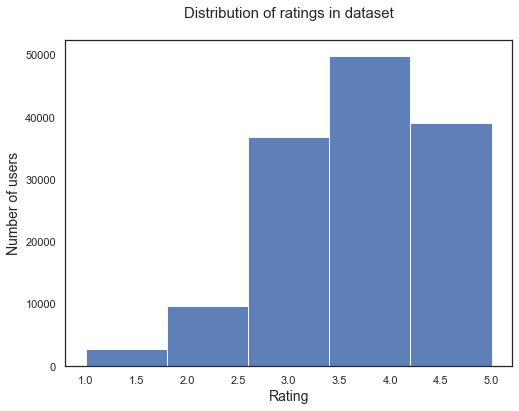

In [97]:
sns.set_style('white')
plt.figure(figsize=(8,6))
users.rating.plot.hist(bins=5,alpha=0.9,color='b')
plt.xlabel('Rating',fontsize=14)
plt.ylabel('Number of users',fontsize=14)
plt.title('Distribution of ratings in dataset\n',fontsize=15)
#plt.savefig('../eda/rating_distribution.png')

Text(0.5, 1.0, 'Distribution of average ratings\n')

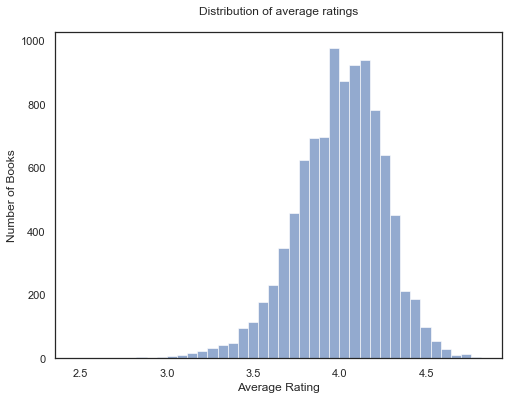

In [98]:
plt.figure(figsize=(8,6))
users.groupby('bid').b_average_rating.first().plot.hist(bins=40,alpha=0.6)
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.title('Distribution of average ratings\n')
#plt.savefig('../eda/avg_rating_dist.png')

In [99]:
#Save updated users dataframe as a csv file. This is the dataframe that we will use for our final model
#users.to_csv('goodreads2/user_w_uid_bavg_titles.csv',index=None)

# Let's also save a file with the new bids agains whether or not the books have been classified as diverse

divm = users.groupby('bid')['is_div'].max().values

#pd.DataFrame(divm).reset_index().to_csv('div_array.csv',index=None)

In [100]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138459 entries, 72 to 981670
Data columns (total 13 columns):
book_id              138459 non-null int64
user_id              138459 non-null int64
rating               138459 non-null int64
goodreads_book_id    138459 non-null int64
is_div               138459 non-null int64
uid                  138459 non-null float64
bid                  138459 non-null float64
b_average_rating     138459 non-null float64
title                132445 non-null object
genre                138459 non-null object
top_tags             138459 non-null object
fav_genre            138459 non-null object
author               138459 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 14.8+ MB


In [103]:
#pd.DataFrame(sim).to_csv('goodreads2/tag_similarity.csv',index=None,header=None)